In [47]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import xarray as xr
import tempfile
import thor.data.era5 as era5
import thor.grid as grid
import cdsapi
import pathlib

notebook_name = "input.ipynb"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
data_options = era5.create_options(
    download_dir="/home/ewan/Documents/turbulence_postdoc/era5"
)
grid_options = grid.create_options(
    start_latitude=-14,
    end_latitude=-10,
    start_longitude=129,
    end_longitude=133,
)
print(data_options)
print(grid_options)
era5.check_options(data_options)
urls, times = era5.generate_era5_urls(data_options)
cds_name, requests, local_paths = era5.generate_cdsapi_requests(
    data_options, grid_options
)

{'name': 'era5', 'start': '2005-02-01T00:00:00', 'end': '2005-03-01T00:00:00', 'mode': 'reanalysis', 'format': 'pressure-levels', 'parent': '/g/data/rt52/era5', 'fields': ['z', 'u', 'v'], 'pressure_levels': ['1000', '975', '950', '925', '900', '875', '850', '825', '800', '775', '750', '700', '650', '600', '550', '500', '450', '400', '350', '300', '250', '225', '200', '175', '150', '125', '100', '70', '50', '30', '20', '10', '7', '5', '3', '2', '1'], 'download_dir': '/home/ewan/Documents/turbulence_postdoc/era5', 'start_latitude': None, 'start_longitude': None, 'end_latitude': None, 'end_longitude': None, 'save': False}
{'timestep': None, 'start_latitude': -14, 'end_latitude': -10, 'start_longitude': 129, 'end_longitude': 133, 'central_latitude': None, 'central_longitude': None, 'projection': None, 'start_x': -150000.0, 'end_x': -150000.0, 'start_y': -150000.0, 'end_y': 150000.0, 'start_z': 0, 'end_z': 25000.0, 'grid_spacing': [500, 2500, 2500]}


In [60]:
for field in ['u', 'v']:
    if not pathlib.Path(local_paths[field][0]).parent.exists():
        pathlib.Path(local_paths[field][0]).parent.mkdir(parents=True)

    cdsc = cdsapi.Client()
    cdsc.retrieve(cds_name, requests[field][0], local_paths[field][0])

2024-04-28 12:38:52,577 INFO Welcome to the CDS
2024-04-28 12:38:52,580 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2024-04-28 12:38:52,951 INFO Request is queued
2024-04-28 12:38:54,292 INFO Request is running
2024-04-28 12:57:26,460 INFO Request is completed
2024-04-28 12:57:26,463 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/adaptor.mars.internal-1714297962.1068885-17794-13-96264240-c4e3-4685-b1cf-1b68f6b24762.nc to /home/ewan/Documents/turbulence_postdoc/era5/pressure-levels/reanalysis/u/2005/u_era5_oper_pl_20050201-20050228.nc (13.7M)
2024-04-28 12:57:35,932 INFO Download rate 1.4M/s   
2024-04-28 12:57:36,659 INFO Welcome to the CDS
2024-04-28 12:57:36,663 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2024-04-28 12:57:38,132 INFO Request is queued
2024-04-28 12:57:39,486 INFO Request is running
2024-04-28 

In [61]:
ds = xr.open_mfdataset([local_paths['u'][0], local_paths['v'][0], local_paths['z'][0]], chunks={})

/tmp/ipykernel_142591/2860800321.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  test = ds.interp(longitude=129.1244443, latitude=-11.43445, time=np.datetime64('2005-02-01T00:40:00'), method='linear')


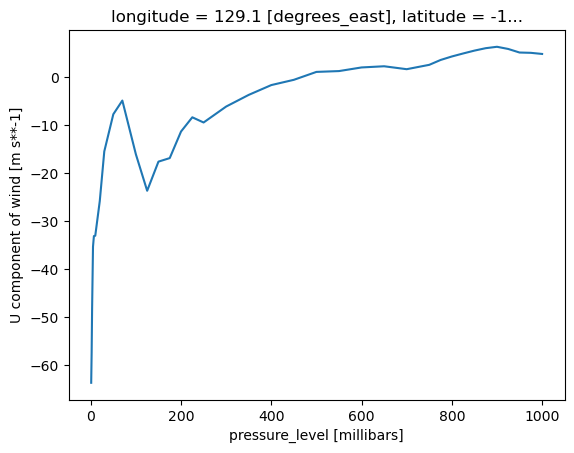

In [69]:
test = ds.interp(longitude=129.1244443, latitude=-11.43445, time=np.datetime64('2005-02-01T00:40:00'), method='linear')
test.load()['u'].plot()